Model Metrics for Linear Regression Model trained for A1
MSE:  1612.1534057676402
RMSE:  40.15163017571815
MAPE:  0.014980253036840228
R2:  0.9759688228170299
Model Metrics for Linear Regression Model trained for A3
MSE:  180.71804434404112
RMSE:  13.443141163583796
MAPE:  0.005190410357572133
R2:  0.9973061699164271
Model Metrics for Clustering Model trained for A4
Silhouette Score:  0.6398821471201498
Calinski Harabasz Score:  435.7931289131713
Davies Bouldin Score:  0.5510092934200174


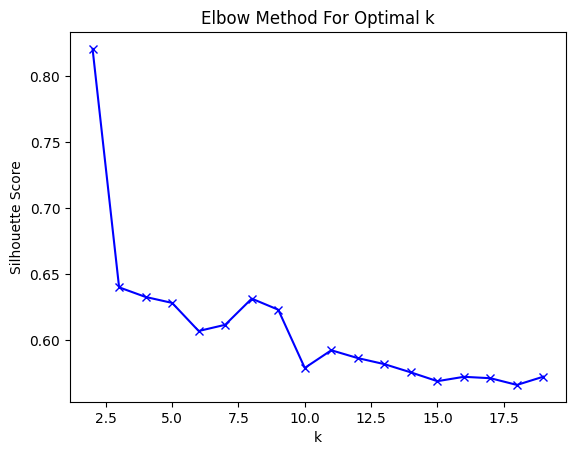

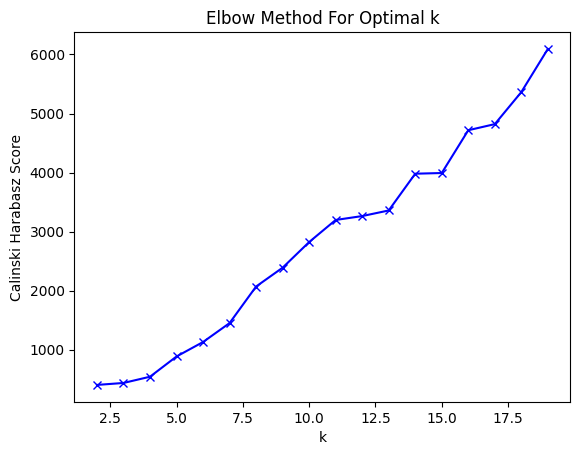

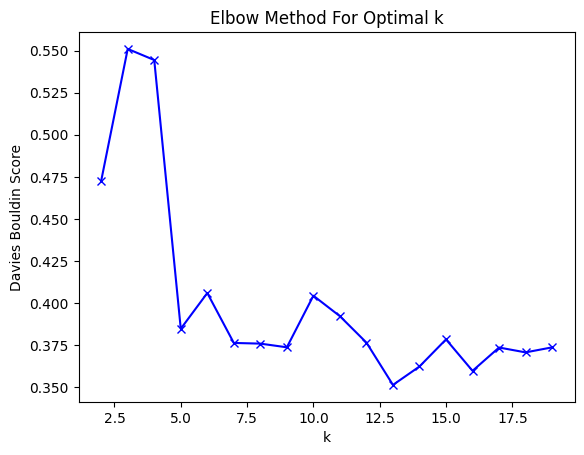

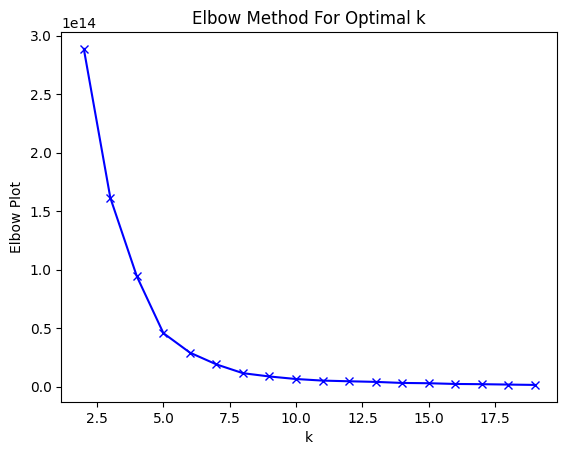

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  mean_absolute_percentage_error, r2_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# function to create and train a linear regression model
def regressionModel(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)  # fitting model on training data
    return model

# function to generate metrics for regression model
def modelReport(model, X, y):
    y_pred = model.predict(X)  # predicting target values
    mse = mean_squared_error(y, y_pred)  # mean squared error
    rmse = mse ** 0.5  # root mean squared error
    mape = mean_absolute_percentage_error(y, y_pred)  # mean absolute percentage error
    r2 = r2_score(y, y_pred)  # R2 score (goodness of fit)
    return mse, rmse, mape, r2

# function to create kmeans clustering model
def clusteringModel(X_train,  n_clusters = 3):
    # using KMeans here with given clusters
    model = KMeans(n_clusters=n_clusters,  random_state=0, n_init="auto")
    model.fit(X_train)  # fitting model on the features
    return model

# function to return cluster evaluation metrics
def clusteringModelReport(model, X):
    silhouette_score_val = silhouette_score(X, model.labels_)  # measures how similar data is within clusters
    calinski_harabasz_score_val = calinski_harabasz_score(X, model.labels_)  # bigger score means better clusters
    davies_bouldin_score_val = davies_bouldin_score(X, model.labels_)  # lower score means better clusters
    return silhouette_score_val, calinski_harabasz_score_val, davies_bouldin_score_val

# plotting metrics against k values (for elbow method kind of)
def metricPlot(k , metric, metric_name):
  plt.plot(k, metric, 'bx-')  # plotting blue x's
  plt.xlabel('k')
  plt.ylabel(metric_name)
  plt.title('Elbow Method For Optimal k')
  plt.show()

if __name__ == '__main__':

  # reading excel file, choosing right sheet
  df = pd.read_excel('Lab Session Data.xlsx', sheet_name = "IRCTC Stock Price")

  # volume column has 'M' or 'K' so converting into numbers in millions or thousands
  df['Volume'] = df['Volume'].apply(lambda val: float(val[0: len(val) - 1]) * 10**6 if val[-1] == 'M' else float(val[0: len(val) - 1]) * 10**3)

  # splitting dataset into train and test (20% test data)
  X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Price', 'Date', 'Month', 'Day', 'Chg%'], axis=1), df['Price'], test_size=0.2, random_state=42)

  # A1 - train regression on only first column (feature)
  lr_model = regressionModel(np.array(X_train[X_train.columns[0]]).reshape(-1,1), y_train)

  # A2 - test above model and print metrics
  mse, rmse, mape, r2 = modelReport(lr_model, np.array(X_test[X_train.columns[0]]).reshape(-1,1), y_test)
  print("Model Metrics for Linear Regression Model trained for A1")
  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("MAPE: ", mape)
  print("R2: ", r2)

  # A3 - train regression on all columns (all features)
  lr_model = regressionModel(X_train, y_train)
  mse, rmse, mape, r2 = modelReport(lr_model, X_test, y_test)
  print("Model Metrics for Linear Regression Model trained for A3")
  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("MAPE: ", mape)
  print("R2: ", r2)

  # A4 - make a clustering model with default n_clusters=3
  cluster = clusteringModel(X_train)

  # A5 - evaluate clustering model
  silhouette_score_val, calinski_harabasz_score_val, davies_bouldin_score_val = clusteringModelReport(cluster, X_train)
  print("Model Metrics for Clustering Model trained for A4")
  print("Silhouette Score: ", silhouette_score_val)
  print("Calinski Harabasz Score: ", calinski_harabasz_score_val)
  print("Davies Bouldin Score: ", davies_bouldin_score_val)

  # A6 and A7 - test different k values for clustering and collect metrics
  k_values = np.arange(2,20)  # trying from k=2 to 19
  silhouette_scores = []
  calinski_harabasz_scores = []
  davies_bouldin_scores = []
  distorsions = []  # inertia values for elbow method

  for k in k_values:
    cluster = clusteringModel(X_train, k)  # train cluster model for this k
    silhouette_score_val, calinski_harabasz_score_val, davies_bouldin_score_val = clusteringModelReport(cluster, X_train)
    silhouette_scores.append(silhouette_score_val)
    calinski_harabasz_scores.append(calinski_harabasz_score_val)
    davies_bouldin_scores.append(davies_bouldin_score_val)
    distorsions.append(cluster.inertia_)  # sum of squared distances

  # plotting all metrics for diff k values
  metricPlot(k_values, silhouette_scores, 'Silhouette Score')
  metricPlot(k_values, calinski_harabasz_scores, 'Calinski Harabasz Score')
  metricPlot(k_values, davies_bouldin_scores, 'Davies Bouldin Score')
  metricPlot(k_values, distorsions, 'Elbow Plot')
